In [3]:
#Import tensorflow and appropriate libraries

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [7]:
#Download the cfar10 dataset and divide into training and test sets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

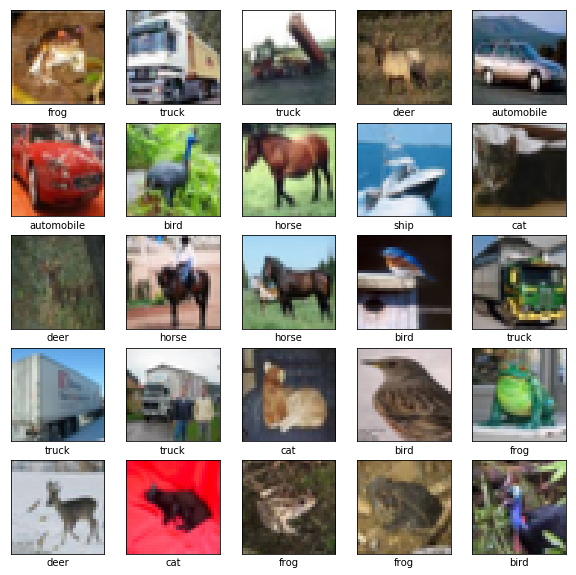

In [8]:
#Verify the data to be sure it is the intended data by displaying samples with labels

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [10]:
#Create the convolutional base. It is simply a stack of Convolutional Maxpooling layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
#Display a summary of the model architecture

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#As seen above the width and height dimensions tend to shrink as you go deeper in the network
#The number of channels is determined by the first argument in the layer. 
#E.g output channel for first CONV2D layer is 32

In [12]:
#Add dense layers on top
#We simply feed the output tensor from the convolutional base of shape(64, 4, 4)
#into one or more dense layers to perform classification
#Dense layers take vectors as input so the current input 3D must be flattened

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))                           #Last Dense layer should equal number of classes and all dense layers are vectors

In [13]:
#Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [16]:
#As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

In [14]:
#Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 117s 2ms/sample - loss: 1.5470 - accuracy: 0.4323 - val_loss: 1.3274 - val_accuracy: 0.5173
Epoch 2/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.2100 - accuracy: 0.5679 - val_loss: 1.2005 - val_accuracy: 0.5737
Epoch 3/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.0652 - accuracy: 0.6219 - val_loss: 1.0441 - val_accuracy: 0.6271
Epoch 4/10
50000/50000 [==============================] - 48s 964us/sample - loss: 0.9680 - accuracy: 0.6587 - val_loss: 1.0009 - val_accuracy: 0.6469
Epoch 5/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.8942 - accuracy: 0.6858 - val_loss: 0.9463 - val_accuracy: 0.6660
Epoch 6/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.8391 - accuracy: 0.7048 - val_loss: 0.8905 - val_accuracy: 0.6924
Epoch 7/10
50000/50000 [=============================

10000/10000 - 5s - loss: 0.8979 - accuracy: 0.6937


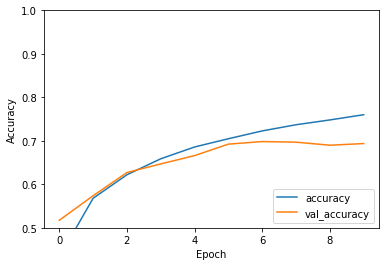

In [15]:
#Evaluate the trained model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [17]:
#Print the accuracy of the trained model
print(test_acc)

0.6937


In [18]:
#The trained model has accuracy of approximately 70%